In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import ssl

In [2]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

In [4]:
#Посмотреть первые несколько рядов таблицы
df.head()
#df[df['Positive affect'].isna()] #Qatar
df = df[df['Country (region)'] != 'Qatar']   #у Катара поля не заполнены

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.]),
 array([  1.        ,   1.99354839,   2.98709677,   3.98064516,
          4.97419355,   5.96774194,   6.96129032,   7.95483871,
          8.9483871 ,   9.94193548,  10.93548387,  11.92903226,
         12.92258065,  13.91612903,  14.90967742,  15.90322581,
         16.89677419,  17.89032258,  18.88

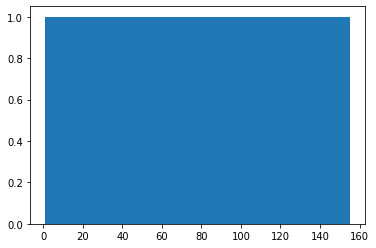

In [5]:
#Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?
#это равномерное распределение
plt.hist(df['Freedom'], bins = 155)

(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.]),
 array([  1.        ,   1.99354839,   2.98709677,   3.98064516,
          4.97419355,   5.96774194,   6.96129032,   7.95483871,
          8.9483871 ,   9.94193548,  10.93548387,  11.92903226,
         12.92258065,  13.91612903,  14.90967742,  15.90322581,
         16.89677419,  17.89032258,  18.88

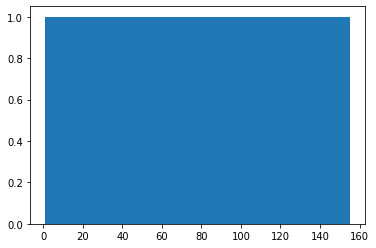

In [6]:
plt.hist(df['Positive affect'], bins = 155)

In [9]:
#Найти медиану, моду, математическое ожидание, стандартное отклонение, дисперсию, 
#минимум и максимум, найти выбросы (если есть), размах для колонки Freedom
df.mean()['Freedom']   #78
df.mode()['Freedom'] #нет решения потому что все значения выборки встречаются только один раз
df.median()['Freedom']   #78
df.std()['Freedom']  #44.88875137492688
df.std()['Freedom'] ** 2  #2015.0000000000002
df.min()['Freedom']   #1
df.max()['Freedom']   #155
#выбросов нет, размах = 155 - 1 = 154

155.0

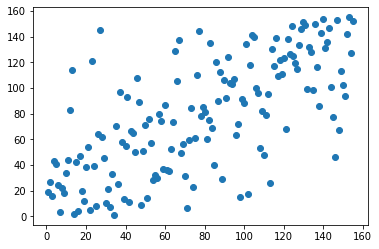

In [10]:
#Посмотреть корреляцию между Freedom и positive affect (графически и математически). 
#Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?
plt.scatter(df.Freedom, df['Positive affect'])

In [19]:
from scipy.stats import pearsonr
corr ,p_value = pearsonr(df.Freedom, df['Positive affect'])
corr

0.6817698430601657

In [43]:
#Нормализовать данные колонки Freedom (централизация + масштабирование)
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
Freedom = scaler.fit_transform(np.array(df['Freedom']).reshape(-1, 1))
Freedom.mean()

0.5

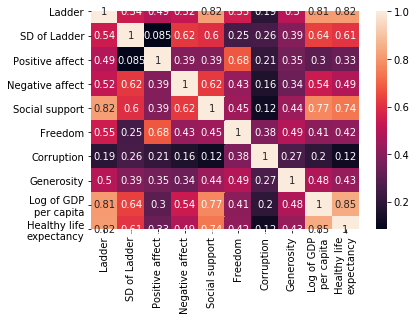

In [44]:
#Построить матрицу корреляций для всех колонок таблицы
import seaborn as sns
sns.heatmap(df.corr(), annot = True)

In [52]:
#Загрузить таблицу цен на авокадо:
df=pd.read_csv('avocado.txt')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


(array([5.000e+00, 2.400e+01, 5.200e+01, 8.100e+01, 1.690e+02, 2.570e+02,
        3.870e+02, 3.810e+02, 6.490e+02, 9.580e+02, 8.500e+02, 1.029e+03,
        1.074e+03, 8.600e+02, 1.011e+03, 7.240e+02, 9.760e+02, 1.005e+03,
        8.450e+02, 9.560e+02, 8.890e+02, 6.620e+02, 6.780e+02, 5.080e+02,
        6.750e+02, 5.330e+02, 3.550e+02, 3.300e+02, 2.320e+02, 2.220e+02,
        1.850e+02, 1.080e+02, 1.080e+02, 1.210e+02, 7.600e+01, 4.800e+01,
        2.900e+01, 3.900e+01, 3.700e+01, 2.400e+01, 2.300e+01, 1.800e+01,
        2.000e+01, 1.500e+01, 1.000e+01, 5.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00]),
 array([0.44  , 0.4962, 0.5524, 0.6086, 0.6648, 0.721 , 0.7772, 0.8334,
        0.8896, 0.9458, 1.002 , 1.0582, 1.1144, 1.1706, 1.2268, 1.283 ,
        1.3392, 1.3954, 1.4516, 1.5078, 1.564 , 1.6202, 1.6764, 1.7326,
        1.7888, 1.845 , 1.9012, 1.9574, 2.0136, 2.0698, 2.126 , 2.1822,
        2.2384, 2.2946, 2.3508, 2.407 , 2.4632, 2.5194, 2.5756, 2.6318,
        2.688 , 

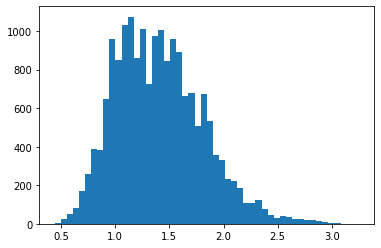

In [108]:
#Сделать частотный график колонки AveragePrice. Какое это распределение?
plt.hist(df['AveragePrice'], bins = 50)
#похоже на нормальное распределение
#однако, 4046, 4225, 4770 - не являются нормальными
plt.hist(df[(df['4770'] > 0)&(df['4770'] < 1000)]['4770'], bins = 100)

In [100]:
#Найти корреляцию в следующих колонках: колонкой 4046, 4225, 4770 и Average Price. 
#Если корелляция есть (обратная или прямая), то какие выводы можно сделать?
corr1 ,p_value1 = sts.pearsonr(df['4046'], df['AveragePrice'])
corr2, p_value2 = sts.spearmanr(df['4046'], df['AveragePrice'])
corr3, p_value3 = sts.kendalltau(df['4046'], df['AveragePrice'])
corr1, corr2, corr3

(-0.2083170484878848, -0.5961701841279068, -0.41677702878694456)

In [92]:
df_new = df[['4046','4225','4770','AveragePrice']]
df_new.corr()
#корреляцию Пирсона нельзя использовать, т.к. распределения '4046','4225','4770' не являются нормальными
#по Спирману есть корреляция (0.75 - 0.82) между '4046','4225','4770', что допустимо, если растет спрос на авкадо, то он растет для всех марок. 
#Корреляции со средней ценой.

,4046,4225,4770,AveragePrice
4046,1.000000,0.926110,0.833389,-0.208317
4225,0.926110,1.000000,0.887855,-0.172928
4770,0.833389,0.887855,1.000000,-0.179446
AveragePrice,-0.208317,-0.172928,-0.179446,1.000000


In [144]:
corr1 ,p_value1 = sts.pearsonr(df['4046'], df['4225'])
corr2, p_value2 = sts.spearmanr(df['4046'], df['4225'])
corr3, p_value3 = sts.kendalltau(df['4046'], df['4225'])
corr1, corr2, corr3

(0.9261099558992297, 0.7939391911434058, 0.5927205849040433)

In [146]:
corr1 ,p_value1 = sts.pearsonr(df['4046'], df['4770'])
corr2, p_value2 = sts.spearmanr(df['4046'], df['4770'])
corr3, p_value3 = sts.kendalltau(df['4046'], df['4770'])
corr1, corr2, corr3

(0.8333891041719166, 0.7548383147584622, 0.5654990633860835)

In [147]:
corr1 ,p_value1 = sts.pearsonr(df['4225'], df['4770'])
corr2, p_value2 = sts.spearmanr(df['4225'], df['4770'])
corr3, p_value3 = sts.kendalltau(df['4225'], df['4770'])
corr1, corr2, corr3

(0.8878549976059533, 0.8199051095957544, 0.6320017870262711)

In [149]:
corr1 ,p_value1 = sts.pearsonr(df['4770'], df['AveragePrice'])
corr2, p_value2 = sts.spearmanr(df['4770'], df['AveragePrice'])
corr3, p_value3 = sts.kendalltau(df['4770'], df['AveragePrice'])
corr1, corr2, corr3

(-0.1794459839797562, -0.5328254290377853, -0.37450739985891623)